In [1]:
import pandas as pd
import os
import ydata_profiling as yp
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('../data/data_outliers_cap.csv')
df.head()

,country,productgroup,category,style,gender,main_color,sec_color,has_extra_sizes,year,month,...,ratio,discount_pct,cost,sales,unit_profit,total_profit,profit_margin,promo1,promo2,label
0,Germany,SHOES,TRAINING,slim,women,chocolate,lavender,1,2016,3,...,0.663866,0.336134,13.29,28,-9.34,-261.52,-1.548437,0,0,0
1,Germany,SHORTS,TRAINING,regular,women,darkkhaki,lavender,1,2016,3,...,0.663866,0.336134,2.29,28,1.66,46.48,0.420253,0,0,0
2,Germany,HARDWARE ACCESSORIES,GOLF,regular,women,goldenrod,lavender,1,2016,3,...,0.663866,0.336134,1.70,28,2.25,63.00,0.569620,0,0,0
3,Germany,SHOES,RUNNING,regular,kids,rosybrown,lightblue,1,2016,3,...,0.663866,0.336134,9.00,28,-5.05,-141.40,-1.278481,0,0,0
4,Germany,SHOES,RELAX CASUAL,regular,women,blueviolet,lightblue,1,2016,3,...,0.663866,0.336134,9.60,28,-5.65,-158.20,-1.430380,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99955 entries, 0 to 99954
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          99955 non-null  object 
 1   productgroup     99955 non-null  object 
 2   category         99955 non-null  object 
 3   style            99955 non-null  object 
 4   gender           99955 non-null  object 
 5   main_color       99955 non-null  object 
 6   sec_color        99955 non-null  object 
 7   has_extra_sizes  99955 non-null  int64  
 8   year             99955 non-null  int64  
 9   month            99955 non-null  int64  
 10  week_number      99955 non-null  int64  
 11  regular_price    99955 non-null  float64
 12  current_price    99955 non-null  float64
 13  ratio            99955 non-null  float64
 14  discount_pct     99955 non-null  float64
 15  cost             99955 non-null  float64
 16  sales            99955 non-null  int64  
 17  unit_profit 

In [4]:
repeat = False

if not os.path.exists("../reports/fourth_eda_report.html") or repeat:
    profile = yp.ProfileReport(df)
    profile.to_file("../reports/fourth_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Check for Duplicates
df.duplicated().sum()

0

In [6]:
df.describe(include='object')

,country,productgroup,category,style,gender,main_color,sec_color
count,99955,99955,99955,99955,99955,99955,99955
unique,3,4,6,3,4,10,3
top,Germany,SHOES,TRAINING,regular,women,blueviolet,rosybrown
freq,49380,59975,29986,49979,69968,9998,39981


In [7]:
df.describe().round(2)

,has_extra_sizes,year,month,week_number,regular_price,current_price,ratio,discount_pct,cost,sales,unit_profit,total_profit,profit_margin,promo1,promo2,label
count,99955.0,99955.00,99955.00,99955.00,99955.00,99955.00,99955.00,99955.00,99955.00,99955.00,99955.00,99955.00,99955.00,99955.00,99955.00,99955.00
mean,0.9,2015.70,5.91,24.35,52.41,28.28,0.55,0.45,6.52,53.72,21.77,865.32,0.56,0.06,0.00,0.14
std,0.3,0.72,3.53,15.62,35.27,22.49,0.19,0.19,3.91,71.40,22.84,1441.47,0.53,0.24,0.07,0.35
min,0.0,2014.00,1.00,1.00,3.95,1.95,0.30,0.00,1.29,1.00,-11.34,-3842.00,-1.55,0.00,0.00,0.00
25%,1.0,2015.00,3.00,11.00,25.95,11.95,0.35,0.30,2.29,10.00,5.66,73.40,0.45,0.00,0.00,0.00
50%,1.0,2016.00,5.00,22.00,40.95,20.95,0.53,0.47,8.70,26.00,15.35,316.75,0.75,0.00,0.00,0.00
75%,1.0,2016.00,9.00,38.00,79.95,37.95,0.70,0.65,9.60,64.00,31.75,998.48,0.89,0.00,0.00,0.00
max,1.0,2017.00,12.00,53.00,197.95,139.45,1.00,0.70,13.29,344.00,136.14,6390.00,0.99,1.00,1.00,1.00


# Data Split

In [8]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((79964, 22), (19991, 22), (79964,), (19991,))

# Data Preprocessing

In [14]:
cat_cols =df.select_dtypes(include=['object']).columns
cat_cols

Index(['country', 'productgroup', 'category', 'style', 'gender', 'main_color',
       'sec_color'],
      dtype='object')

In [15]:
preprocessor = ColumnTransformer([ ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols),
                                 ], remainder='passthrough')
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)
X_train_prep.shape, X_test_prep.shape

((79964, 41), (19991, 41))

# Logistic Regression

In [16]:
log_reg = LogisticRegression(random_state=42, max_iter=10000, solver='liblinear', class_weight='balanced')

lr_cv_results = cross_validate(log_reg, X_train_prep, y_train, cv=5, scoring=['accuracy', 'precision', 'recall' , 'f1', 'roc_auc'])
print(lr_cv_results['test_accuracy'].mean())
print(lr_cv_results['test_precision'].mean())
print(lr_cv_results['test_recall'].mean())
print(lr_cv_results['test_f1'].mean())
print(lr_cv_results['test_roc_auc'].mean())

0.7547396197004274
0.34264317331367666
0.8279921060205299
0.48469586845238216
0.8576991386771811


In [17]:
log_reg_param_grid = {
    'C': [0.01, 0.1, 10],
    'penalty': ['l1', 'l2']
}

log_reg_grid_search = GridSearchCV(log_reg, log_reg_param_grid, cv=3, refit=False, scoring=['accuracy', 'precision', 'recall' , 'f1'])
log_reg_grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000, random_state=42,
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 10], 'penalty': ['l1', 'l2']},
             refit=False, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
log_reg_grid_search_results = pd.DataFrame(log_reg_grid_search.cv_results_)
log_reg_grid_search_results = log_reg_grid_search_results[['param_C', 'param_penalty', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']]
log_reg_grid_search_results.round(2)

,param_C,param_penalty,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,0.01,l1,0.73,0.39,0.81,0.52
1,0.01,l2,0.73,0.39,0.80,0.52
2,0.1,l1,0.74,0.39,0.80,0.53
3,0.1,l2,0.74,0.39,0.81,0.53
4,10,l1,0.74,0.39,0.80,0.53
5,10,l2,0.74,0.39,0.80,0.53


In [ ]:
best_log_reg_params = {
    'C': 0.1,
    'penalty': 'l2'}

best_log_reg = LogisticRegression(**best_log_reg_params, random_state=42, max_iter=10000, solver='liblinear', class_weight='balanced')
best_log_reg.fit(X_train_prep, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000,
                   random_state=42, solver='liblinear')

	 Log Reg classification report on training set
############################################################
              precision    recall  f1-score   support

           0       0.94      0.72      0.82     42105
           1       0.39      0.81      0.53      9414

    accuracy                           0.74     51519
   macro avg       0.67      0.76      0.67     51519
weighted avg       0.84      0.74      0.76     51519

############################################################
	 Log Reg confusion matrix on training set
############################################################


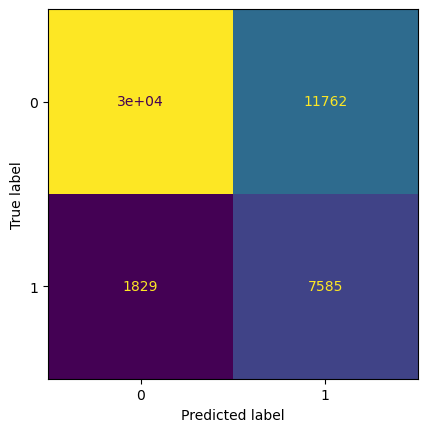

In [ ]:
y_train_pred_lr = best_log_reg.predict(X_train_prep)

print("\t Log Reg classification report on training set")
print('#'*60)
print(classification_report(y_train, y_train_pred_lr))
print('#'*60)

print("\t Log Reg confusion matrix on training set")
print('#'*60)

_ = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_lr, colorbar=False)

# Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_cv_results = cross_validate(rf, X_train_prep, y_train, cv=5, scoring=['accuracy', 'precision', 'recall' , 'f1', 'roc_auc'])
print(rf_cv_results['test_accuracy'].mean())
print(rf_cv_results['test_precision'].mean())
print(rf_cv_results['test_recall'].mean())
print(rf_cv_results['test_f1'].mean())
print(rf_cv_results['test_roc_auc'].mean())

0.7331081393708521
0.19419009256722372
0.14627126879970292
0.16685501013137888
0.7154490312928561


In [42]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [None, 'sqrt'],
    'max_depth': [10, 20, 30],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=3, refit=False, scoring=['accuracy', 'precision', 'recall' , 'f1'])
rf_grid_search.fit(X_train_prep, y_train)


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': [None, 'sqrt'],
                         'n_estimators': [100, 200, 300]},
             refit=False, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [43]:
rf_grid_search_results = pd.DataFrame(rf_grid_search.cv_results_)
rf_grid_search_results = rf_grid_search_results[['param_n_estimators', 'param_max_depth', 'param_max_features',  'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']]
rf_grid_search_results.round(2)

,param_n_estimators,param_max_depth,param_max_features,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,100,10,None,0.70,0.37,0.87,0.52
1,200,10,None,0.70,0.37,0.87,0.52
2,300,10,None,0.70,0.37,0.88,0.52
3,100,10,sqrt,0.69,0.36,0.90,0.52
4,200,10,sqrt,0.69,0.36,0.90,0.52
5,300,10,sqrt,0.69,0.36,0.90,0.52
6,100,20,None,0.73,0.29,0.33,0.31
7,200,20,None,0.73,0.29,0.33,0.31
8,300,20,None,0.73,0.29,0.33,0.31
9,100,20,sqrt,0.74,0.27,0.26,0.26


In [45]:
rf_grid_search_best_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'max_features': 'sqrt'
}

best_rf = RandomForestClassifier(**rf_grid_search_best_params, random_state=42, class_weight='balanced')
best_rf.fit(X_train_prep, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

	 RF classification report on training set
############################################################
              precision    recall  f1-score   support

           0       0.98      0.65      0.78     42105
           1       0.38      0.95      0.54      9414

    accuracy                           0.70     51519
   macro avg       0.68      0.80      0.66     51519
weighted avg       0.87      0.70      0.74     51519

############################################################
	 RF confusion matrix on training set
############################################################


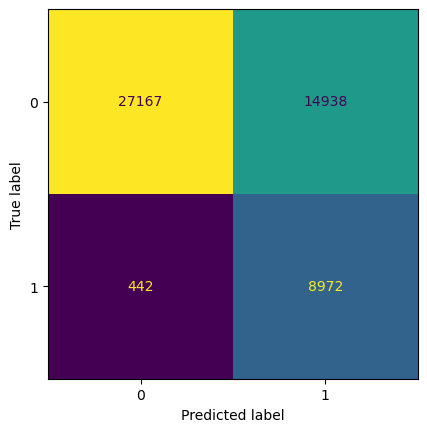

In [46]:
y_train_pred_rf = best_rf.predict(X_train_prep)

print("\t RF classification report on training set")
print('#'*60)
print(classification_report(y_train, y_train_pred_rf))
print('#'*60)

print("\t RF confusion matrix on training set")
print('#'*60)

_ = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_rf, colorbar=False)

# XGBoost

In [47]:
xgb = XGBClassifier(random_state=42)

xgb_cv_results = cross_validate(xgb, X_train_prep, y_train, cv=5, scoring=['accuracy', 'precision', 'recall' , 'f1', 'roc_auc'])
print(xgb_cv_results['test_accuracy'].mean())
print(xgb_cv_results['test_precision'].mean())
print(xgb_cv_results['test_recall'].mean())
print(xgb_cv_results['test_f1'].mean())
print(xgb_cv_results['test_roc_auc'].mean())

0.7959005224010616
0.32285353002654904
0.1064371469544326
0.15996906504493355
0.7999232462790353


In [ ]:
xgb_param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [20, 30],
    'learning_rate': [0.01, 0.1, 1]
}

xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv=3, refit=False, scoring=['accuracy', 'precision', 'recall' , 'f1'])
xgb_grid_search.fit(X_train_prep, y_train)

In [ ]:
xgb_grid_search_results = pd.DataFrame(xgb_grid_search.cv_results_)
xgb_grid_search_results = xgb_grid_search_results[['param_n_estimators', 'param_max_depth', 'param_learning_rate',  'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']]
xgb_grid_search_results.round(3)

,param_n_estimators,param_max_depth,param_learning_rate,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,100,10,0.01,0.817,0.416,0.003,0.006
1,200,10,0.01,0.812,0.337,0.028,0.052
2,300,10,0.01,0.808,0.349,0.059,0.101
3,100,20,0.01,0.815,0.259,0.008,0.015
4,200,20,0.01,0.779,0.214,0.079,0.115
5,300,20,0.01,0.762,0.221,0.121,0.156
6,100,30,0.01,0.814,0.246,0.008,0.016
7,200,30,0.01,0.775,0.207,0.082,0.118
8,300,30,0.01,0.756,0.214,0.125,0.158
9,100,10,0.1,0.792,0.305,0.108,0.159
